### 3. Modelamiento

Una vez preparados los datos, se procede con el modelamiento. Recuerdar que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.


Cargamos la base de datos

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [63]:
import pandas as pd
df = pd.read_csv('df_preparado.csv')

In [64]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,AGENTE AISLADO,HOSPITALIZACION,DIAS HOSPITALIZACIÓN UPC
0,53.0,0,0,-0.996841,0,1,1,-0.254799,0,0,0,1,0.0,1,-0.071876
1,56.0,0,0,-0.407747,0,1,1,-0.254799,0,0,0,1,0.0,1,-0.071876
2,57.0,0,0,2.983526,1,1,1,2.813590,0,0,0,1,1.0,1,15.237672
3,56.0,0,0,-0.519197,0,1,1,-0.254799,0,0,0,1,0.0,1,-0.071876
4,55.0,0,0,2.983526,1,1,1,2.813590,0,0,0,1,1.0,1,15.237672


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     570 non-null    float64
 1   DIABETES                                 570 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES               570 non-null    int64  
 3   PSA                                      570 non-null    float64
 4   BIOPSIAS PREVIAS                         570 non-null    int64  
 5   VOLUMEN PROSTATICO                       570 non-null    int64  
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  570 non-null    int64  
 7   NUMERO DE MUESTRAS TOMADAS               570 non-null    float64
 8   CUP                                      570 non-null    int64  
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA        570 non-null    int64  
 10  BIOPSIA                                  570 non-n

In [66]:
df.shape

(570, 15)

Separar el dataset en X, y (variable objetivo)

In [67]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Separar el dataset en X (características) y y (variable objetivo)
X = df.drop('HOSPITALIZACION', axis=1)  # Excluir la variable objetivo
y = df['HOSPITALIZACION']

# Mostrar las dimensiones de X e y
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)



Dimensiones de X: (570, 14)
Dimensiones de y: (570,)


Separar el dataset en X_train, X_test, y_train y y_test

In [68]:
# Importar la función train_test_split
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (456, 14)
Dimensiones de X_test: (114, 14)
Dimensiones de y_train: (456,)
Dimensiones de y_test: (114,)


Ahora instanciamos, entrenamos y predecimos sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instanciar el clasificador de árbol de decisión
tree_classifier = DecisionTreeClassifier(max_depth=5)  # Puedes ajustar la profundidad máxima

# Entrenar el modelo con los datos de entrenamiento
tree_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)



Realizamos la matriz de confusión para este modelo. 

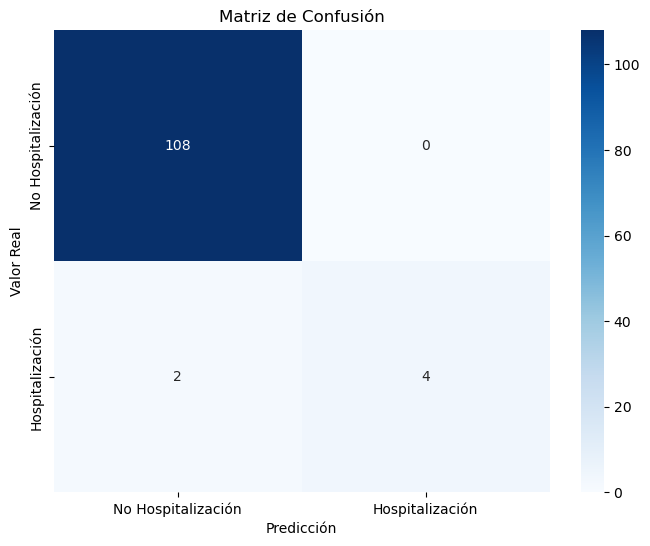

In [70]:
# Crear y mostrar la matriz de confusión como un mapa de calor
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hospitalización', 'Hospitalización'], yticklabels=['No Hospitalización', 'Hospitalización'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


Métricas de evaluación para este modelo de clasificación y el significado de cada una de ellas para el modelo creado.

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcular y mostrar la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

# Calcular y mostrar la precisión (precision)
precision = precision_score(y_test, y_pred)
print(f'Precisión (Precision): {precision:.4f}')

# Calcular y mostrar la recuperación (recall)
recall = recall_score(y_test, y_pred)
print(f'Recuperación (Recall): {recall:.4f}')


Exactitud (Accuracy): 0.9825
Precisión (Precision): 1.0000
Recuperación (Recall): 0.6667


El modelo de clasificación tiene una exactitud (accuracy) del 98.25%, lo que significa que aproximadamente el 98.25% de las predicciones fueron correctas en relación con el total de predicciones. Este alto nivel de exactitud sugiere que el modelo es efectivo en general.

La precisión (precision) del modelo es del 100%, indicando que todas las predicciones positivas realizadas por el modelo fueron correctas. Esto es crucial en escenarios donde los falsos positivos deben minimizarse, ya que en este caso, se quiere asegurar que todas las hospitalizaciones predichas sean realmente casos positivos.

La recuperación (recall) del modelo es del 66.67%, lo que significa que el modelo identificó correctamente el 66.67% de todos los casos reales de hospitalización. Aunque esta métrica es menor que la precisión, sigue siendo importante en el contexto médico, ya que se quiere asegurar que la mayoría de los casos de hospitalización sean capturados, aunque a expensas de algunos falsos positivos.

Diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

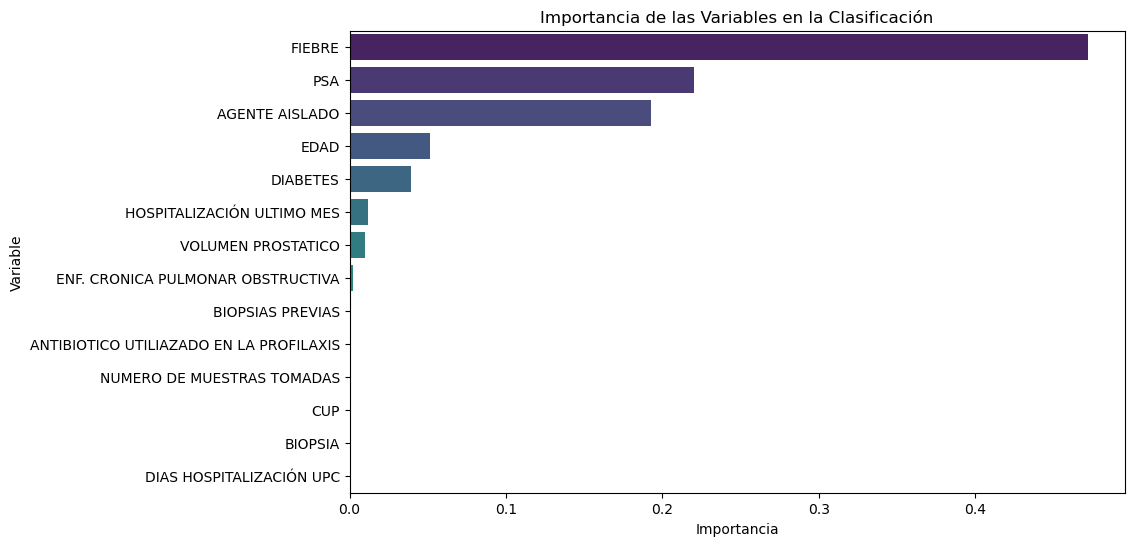

In [72]:
# Obtener la importancia de cada variable
importances = tree_classifier.feature_importances_

# Crear un DataFrame para mostrar las importancias junto con los nombres de las variables
feature_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importances
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='viridis')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables en la Clasificación')
plt.show()


Exploramos cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construimos un modelo con este valor y comparamos las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [73]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de max_depth que deseas probar
param_grid = {'max_depth': [3, 5, 7, 10, 15, None]}

# Instanciar el clasificador de árbol de decisión
tree_classifier = DecisionTreeClassifier()

# Instanciar el objeto GridSearchCV
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor para max_depth
best_max_depth = grid_search.best_params_['max_depth']
print("Mejor valor para max_depth:", best_max_depth)

# Crear un árbol de decisión con el mejor valor encontrado
best_tree_classifier = DecisionTreeClassifier(max_depth=best_max_depth)

# Entrenar el modelo con los datos de entrenamiento
best_tree_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_best = best_tree_classifier.predict(X_test)

# Mostrar las métricas de evaluación para el modelo con max_depth óptimo
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)

print("Métricas de evaluación para modelo con max_depth óptimo:")
print("Exactitud (Accuracy):", accuracy_best)
print("Precisión (Precision):", precision_best)
print("Recuperación (Recall):", recall_best)



Mejor valor para max_depth: 3
Métricas de evaluación para modelo con max_depth óptimo:
Exactitud (Accuracy): 0.9824561403508771
Precisión (Precision): 1.0
Recuperación (Recall): 0.6666666666666666


Instanciamos, entrenamos y predecimos sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [74]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar el clasificador de k-vecinos
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos (k)

# Entrenar el modelo con los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn_classifier.predict(X_test)



In [75]:
# Calcular y mostrar la exactitud
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (modelo k-vecinos): {accuracy_knn}')

# Otras métricas
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Precision (modelo k-vecinos): {precision_knn}')
print(f'Recall (modelo k-vecinos): {recall_knn}')

Accuracy (modelo k-vecinos): 0.9473684210526315
Precision (modelo k-vecinos): 0.0
Recall (modelo k-vecinos): 0.0


c:\Users\nicol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Buscamos el valor óptimo para k

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los parámetros a ajustar
param_grid = {'n_neighbors': range(1, 21)}

# Instanciar el clasificador de k-vecinos
knn = KNeighborsClassifier()

# Instanciar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor para k
best_k = grid_search.best_params_['n_neighbors']
print(f'Mejor valor para K (n_neighbors): {best_k}')

# Obtener la mejor puntuación de precisión
best_accuracy = grid_search.best_score_
print(f'Mejor puntuación de precisión: {best_accuracy}')

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred_optimized_knn = grid_search.predict(X_test)




Mejor valor para K (n_neighbors): 1
Mejor puntuación de precisión: 0.9758719541328237


Comparación entre modelos.


Accuracy (modelo k-vecinos optimizado): 0.9736842105263158
Precision (modelo k-vecinos optimizado): 0.8
Recall (modelo k-vecinos optimizado): 0.6666666666666666


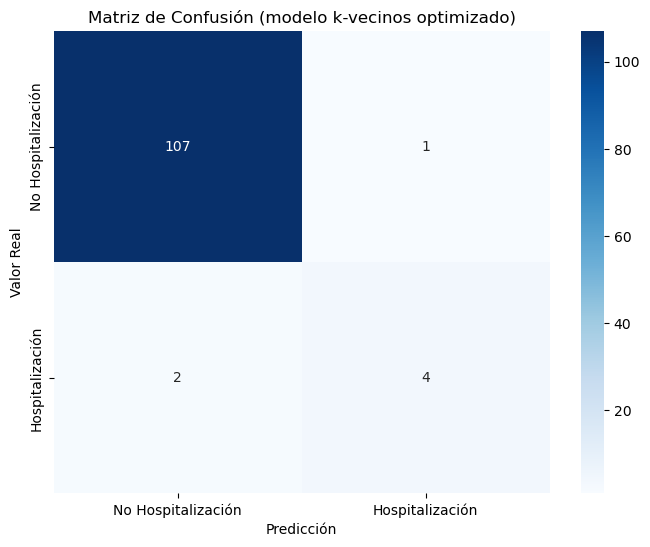

In [77]:
# Calcular y mostrar las métricas de evaluación para el modelo optimizado
accuracy_optimized_knn = accuracy_score(y_test, y_pred_optimized_knn)
precision_optimized_knn = precision_score(y_test, y_pred_optimized_knn)
recall_optimized_knn = recall_score(y_test, y_pred_optimized_knn)

print(f'\nAccuracy (modelo k-vecinos optimizado): {accuracy_optimized_knn}')
print(f'Precision (modelo k-vecinos optimizado): {precision_optimized_knn}')
print(f'Recall (modelo k-vecinos optimizado): {recall_optimized_knn}')

# Crear y mostrar la matriz de confusión como un mapa de calor para el modelo optimizado
conf_matrix_optimized_knn = confusion_matrix(y_test, y_pred_optimized_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hospitalización', 'Hospitalización'], yticklabels=['No Hospitalización', 'Hospitalización'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (modelo k-vecinos optimizado)')
plt.show()


Los resultados muestran que el modelo de árbol de decisión optimizado tiene un rendimiento superior en términos de accuracy, precision y recall en comparación con el modelo de k-vecinos optimizado. En términos generales, el árbol de decisión parece ser más efectivo para este conjunto de datos específico y el problema de clasificación en cuestión.

Adicionalmente, creo que el modelo pudo haber sido más óptimo con una mejor recogida de datos. Los datos estaban muy desbalanceados lo que induce a un modelo menos eficiente. Soy consciente que en ocasiones no existe alternativa, pero mi sugerencia sería en torno a esta materia. Recoger más datos puede ayudar.